## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
print("columns are ",df.shape[1])
print("rows are",df.shape[0])
print(df.shape)

columns are  13
rows are 545
(545, 13)


In [3]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [4]:
#4 Check for missing  values if any, replace with appropriate values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)

df=df[['area','price']]
df

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
...,...,...
540,3000,1820000
541,2400,1767150
542,3620,1750000
543,2910,1750000


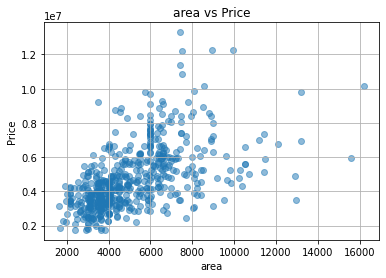

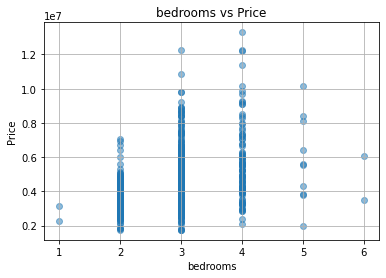

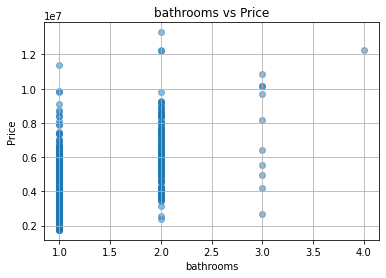

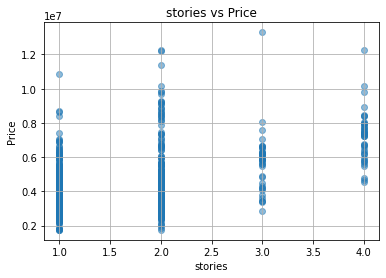

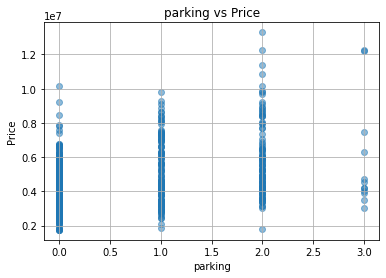

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Housing.csv')

# Convert column names to lowercase and strip spaces (just in case)
df.columns = df.columns.str.strip().str.lower()

# Define dependent and independent variables
dependent_var = 'price'
independent_vars = [col for col in df.columns if col != dependent_var]

# Plot scatterplots
for var in independent_vars:
    if pd.api.types.is_numeric_dtype(df[var]):
        plt.figure(figsize=(6, 4))
        plt.scatter(df[var], df[dependent_var], alpha=0.5)
        plt.xlabel(var)
        plt.ylabel('Price')
        plt.title(f'{var} vs Price')
        plt.grid(True)
       # plt.tight_layout()
        plt.show()
if pd.api.types.is_numeric_dtypes

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    545 non-null    int64
 1   price   545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB
None


In [15]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']  # Replace with actual column names

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])




In [9]:
print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [10]:

#8  Avoiding the Dummy Variable Trap
pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [11]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['furnishingstatus'])

array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,

In [12]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = scaler.fit_transform(df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2,1.804941,furnished
1,12250000,8960,4,4,4,0.405623,-0.465315,-0.734539,-0.219265,1.472618,3,-0.554035,furnished
2,12250000,9960,3,2,2,0.405623,-0.465315,1.361397,-0.219265,-0.679063,2,1.804941,semi-furnished
3,12215000,7500,4,2,2,0.405623,-0.465315,1.361397,-0.219265,1.472618,3,1.804941,furnished
4,11410000,7420,4,1,2,0.405623,2.149083,1.361397,-0.219265,1.472618,2,-0.554035,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0.405623,-0.465315,1.361397,-0.219265,-0.679063,2,-0.554035,unfurnished
541,1767150,2400,3,1,1,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,0,-0.554035,semi-furnished
542,1750000,3620,2,1,1,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,0,-0.554035,unfurnished
543,1750000,2910,3,1,1,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,0,-0.554035,furnished


In [14]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Assuming 'price' is the target variable
X = df.drop(columns=['price'])  # Features (all columns except 'price')
y = df['price']  # Target variable (price)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (381, 1)
X_test shape: (164, 1)
y_train shape: (381,)
y_test shape: (164,)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
#11 Fitting Multiple Linear Regression to the Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred = model.predict(X_train)
train_errors = y_train_pred - y_train
train_errors

126   -2.044979e+05
363    3.582796e+05
370    7.410947e+05
31    -2.796409e+06
113    6.981417e+05
           ...     
71    -1.600856e+06
106   -1.253052e+06
270    1.399731e+05
435    9.832274e+05
102   -1.265580e+06
Name: price, Length: 381, dtype: float64

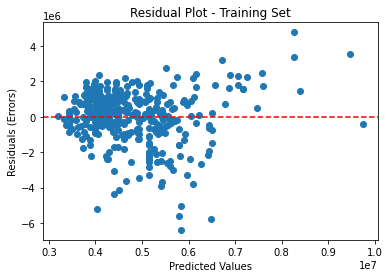

In [20]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_train_pred, train_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Training Set")
plt.show()

In [21]:
#14  Predic on the test set
y_test_pred = model.predict(X_test)
test_errors = y_test_pred - y_test

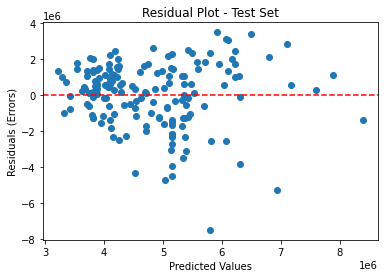

In [22]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(y_test_pred, test_errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot - Test Set")
plt.show()

In [23]:
#16 Print Mean Squared Error and R Squared Value
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}")
print(f"Train R^2: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R^2: {r2_test}")

Train MSE: 2186442182459.0266
Train R^2: 0.30402773725485044
Test MSE: 3193989923757.6206
Test R^2: 0.2583140345296001


In [24]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

n_train, k = X_train.shape
adj_r2_train = adjusted_r2(r2_train, n_train, k)
n_test, _ = X_test.shape
adj_r2_test = adjusted_r2(r2_test, n_test, k)

print(f"Adjusted R^2 (Train): {adj_r2_train}")
print(f"Adjusted R^2 (Test): {adj_r2_test}")

Adjusted R^2 (Train): 0.30219139883072077
Adjusted R^2 (Test): 0.25373572610077044
